In [1]:
import pandas as pd

# Replace with your exact file name
df = pd.read_csv('Real state.csv')

# Show the first 5 rows to verify
df.head()


C:\Users\BARKAT-ALI\AppData\Local\Temp\ipykernel_13960\4167167883.py:4: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Real state.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


In [3]:
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

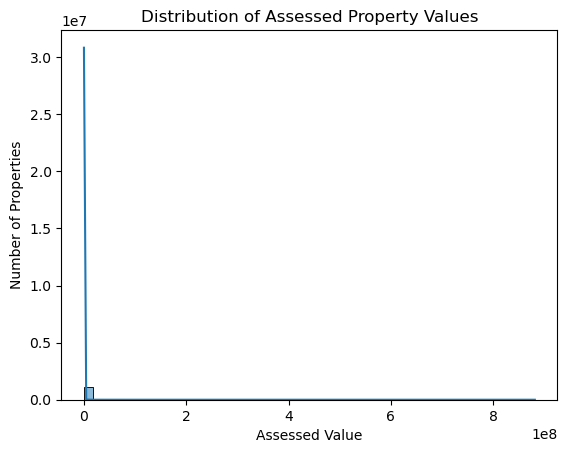

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Assessed Value'], bins=50, kde=True)
plt.title('Distribution of Assessed Property Values')
plt.xlabel('Assessed Value')
plt.ylabel('Number of Properties')
plt.show()


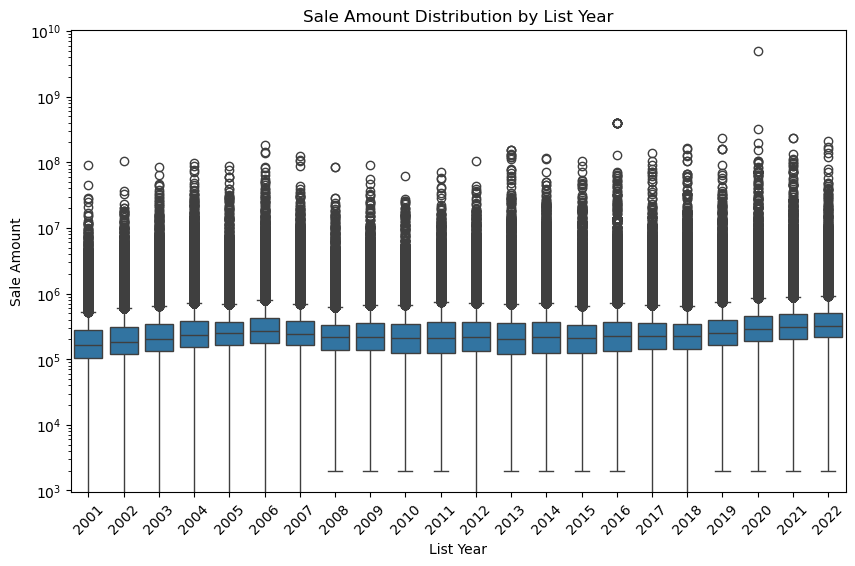

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='List Year', y='Sale Amount', data=df)
plt.yscale('log')  # If values are large
plt.title('Sale Amount Distribution by List Year')
plt.xticks(rotation=45)
plt.show()


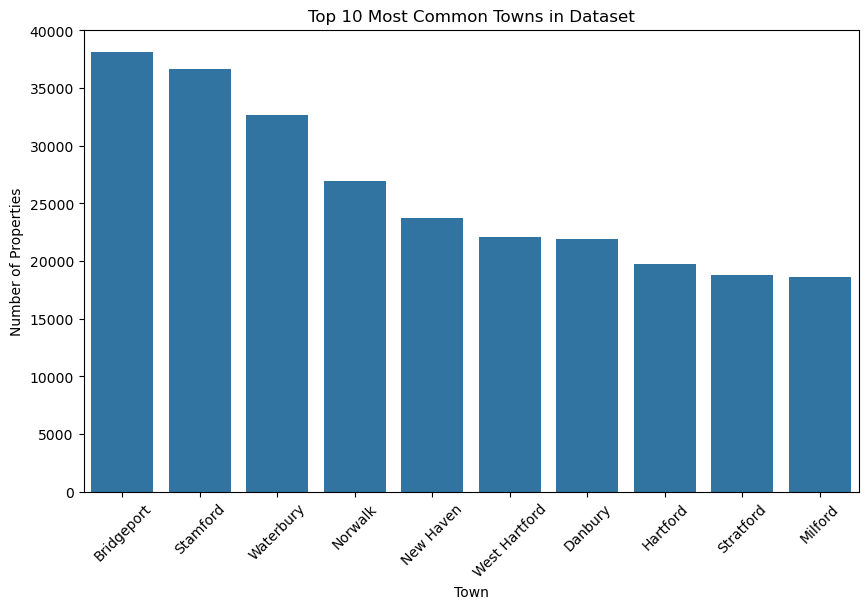

In [6]:
top_towns = df['Town'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_towns.index, y=top_towns.values)
plt.title('Top 10 Most Common Towns in Dataset')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()


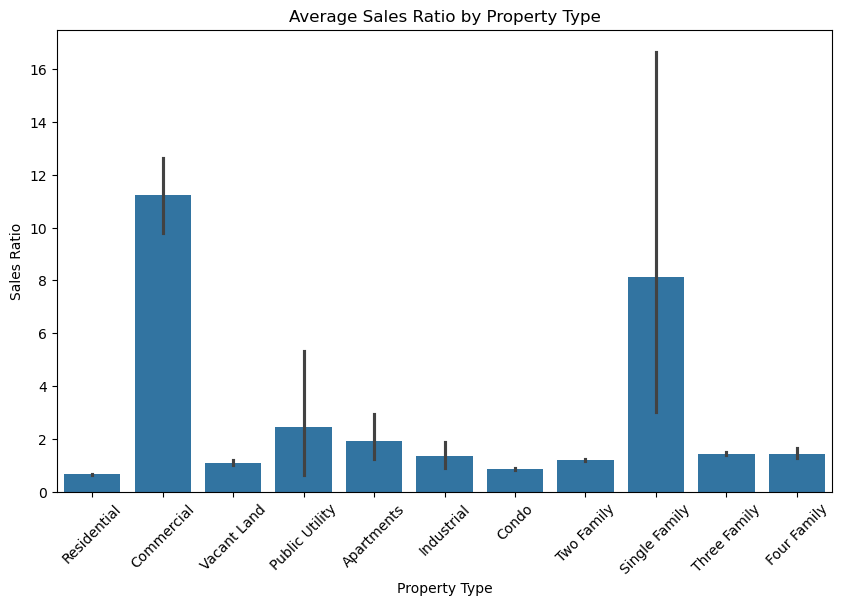

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='Property Type', y='Sales Ratio', data=df)
plt.title('Average Sales Ratio by Property Type')
plt.xticks(rotation=45)
plt.show()


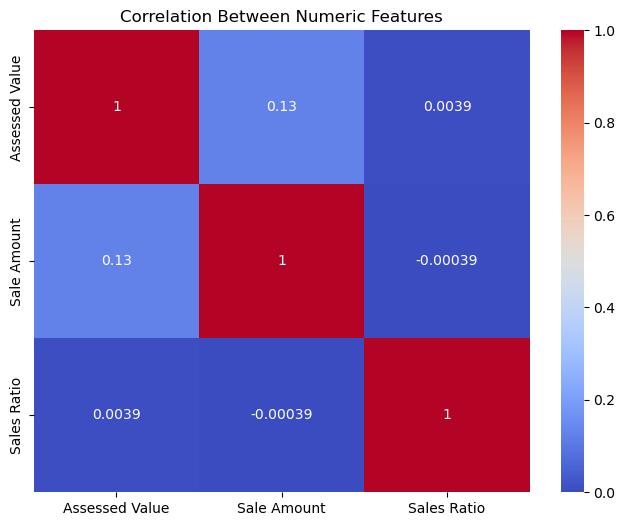

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Assessed Value', 'Sale Amount', 'Sales Ratio']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()


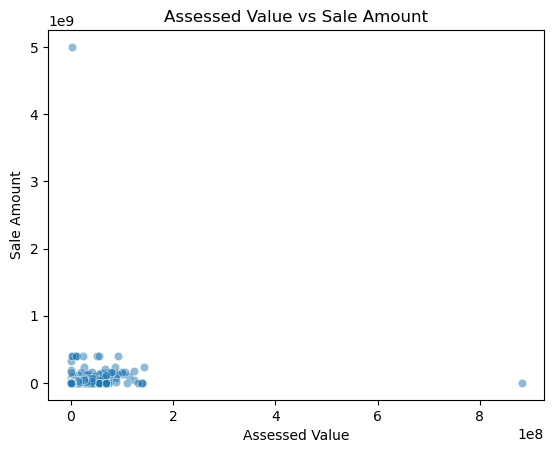

In [9]:
sns.scatterplot(x='Assessed Value', y='Sale Amount', data=df, alpha=0.5)
plt.title('Assessed Value vs Sale Amount')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.show()


In [10]:
df_clean = df.dropna(subset=['Assessed Value', 'Sale Amount', 'List Year', 'Property Type'])
